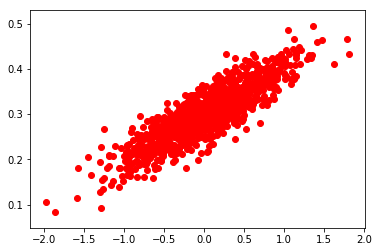

In [3]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# 随机生成1000个点，围绕在y=0.1x+0.3的直线周围
num_points = 1000
vectors_set = []
for i in range(num_points):
    x1 = np.random.normal(0.0, 0.55)
    y1 = x1 * 0.1 + 0.3 + np.random.normal(0.0, 0.03)
    vectors_set.append([x1, y1])

# 生成一些样本
x_data = [v[0] for v in vectors_set]
y_data = [v[1] for v in vectors_set]

plt.scatter(x_data,y_data,c='r')
plt.show()

In [4]:
# 生成1维的W矩阵，取值是[-1,1]之间的随机数
with tf.name_scope('weight'):
    W = tf.Variable(tf.random_uniform([1], -1.0, 1.0), name='W')
# 生成1维的b矩阵，初始值是0
with tf.name_scope('bias'):
    b = tf.Variable(tf.zeros([1]), name='b')
# 经过计算得出预估值y
with tf.name_scope('y'):
    y = W * x_data + b

# 以预估值y和实际值y_data之间的均方误差作为损失
with tf.name_scope('loss'):
    loss = tf.reduce_mean(tf.square(y - y_data), name='loss')
# 采用梯度下降法来优化参数
optimizer = tf.train.GradientDescentOptimizer(0.5)
# 训练的过程就是最小化这个误差值
train = optimizer.minimize(loss, name='train')

sess = tf.Session()

init = tf.global_variables_initializer()
sess.run(init)

# 初始化的W和b是多少
print ("W =", sess.run(W), "b =", sess.run(b), "loss =", sess.run(loss))
# 执行20次训练
for step in range(20):
    sess.run(train)
    # 输出训练好的W和b
    print ("W =", sess.run(W), "b =", sess.run(b), "loss =", sess.run(loss))
writer = tf.summary.FileWriter("logs/", sess.graph)

W = [-0.7567136] b = [0.] loss = 0.31599528
W = [-0.49497783] b = [0.30258167] loss = 0.10880255
W = [-0.31387293] b = [0.30168867] loss = 0.053177446
W = [-0.18784225] b = [0.30107078] loss = 0.026239602
W = [-0.10013767] b = [0.3006408] loss = 0.013194272
W = [-0.03910415] b = [0.30034155] loss = 0.006876745
W = [0.003369] b = [0.30013332] loss = 0.0038173231
W = [0.03292602] b = [0.29998842] loss = 0.0023357214
W = [0.05349471] b = [0.29988757] loss = 0.0016182188
W = [0.06780843] b = [0.29981738] loss = 0.0012707502
W = [0.07776934] b = [0.29976857] loss = 0.0011024796
W = [0.08470112] b = [0.29973456] loss = 0.0010209905
W = [0.08952494] b = [0.29971093] loss = 0.0009815274
W = [0.09288183] b = [0.29969448] loss = 0.00096241635
W = [0.09521788] b = [0.299683] loss = 0.0009531613
W = [0.09684354] b = [0.29967505] loss = 0.00094867934
W = [0.09797483] b = [0.2996695] loss = 0.00094650884
W = [0.09876209] b = [0.29966563] loss = 0.00094545766
W = [0.09930995] b = [0.29966295] loss = 

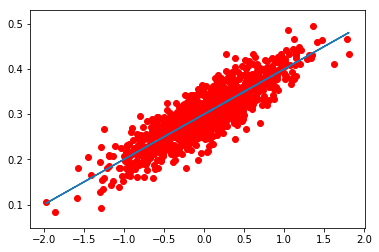

In [5]:
plt.scatter(x_data,y_data,c='r')
plt.plot(x_data,sess.run(W)*x_data+sess.run(b))
plt.show()